In [1]:

import sys
import time
import pandas as pd
sys.path.append(r'..\src')
df = pd.read_csv(r'..\data\dna.csv')
import forgi.visual.mplotlib as fvm
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from GMfold import gmfold, gm_dot_bracket
from seqfold2_0 import fold_2
from seqfold import fold, dot_bracket




# Comparison MGfold, Seqfold, Seqfold 2.0 and mfold/Unafold: Generate Fig. 3 of the paper.
To compute the mfold/unafold ground truth energy associated to the folded structures below, refer to the folding_constraint.txt file. In the file we provide the constraints necessary to compute with UNAfold  the energy associated with the structure obtained with one of the analyzed methods

In [2]:
#Sequence
seq= 'GGGACGACGGGGCACATTGTGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCCGCCTAGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCC'

# dot brachets strucuture computed by mfold in the unafold softwer. We consider this structure to be the ground truth
open_mfold =   [71, 72 , 0, 1, 2, 3, 4, 5, 6, 7, 33, 34, 35, 11, 12, 13, 14]
closed_mfold = [77, 76, 51, 50, 49, 48, 47, 46, 45, 44, 41, 40, 39, 21, 20, 19, 18]
db_mfold = ['.']*len(seq)


# Set '(' at the open_mfold indices
for i in open_mfold:
    db_mfold[i] = '('

# Set ')' at the closed_mfold indices
for i in closed_mfold:
    db_mfold[i] = ')'

# Convert the list back to a string
db_mfold = ''.join(db_mfold)

mfold/unafold


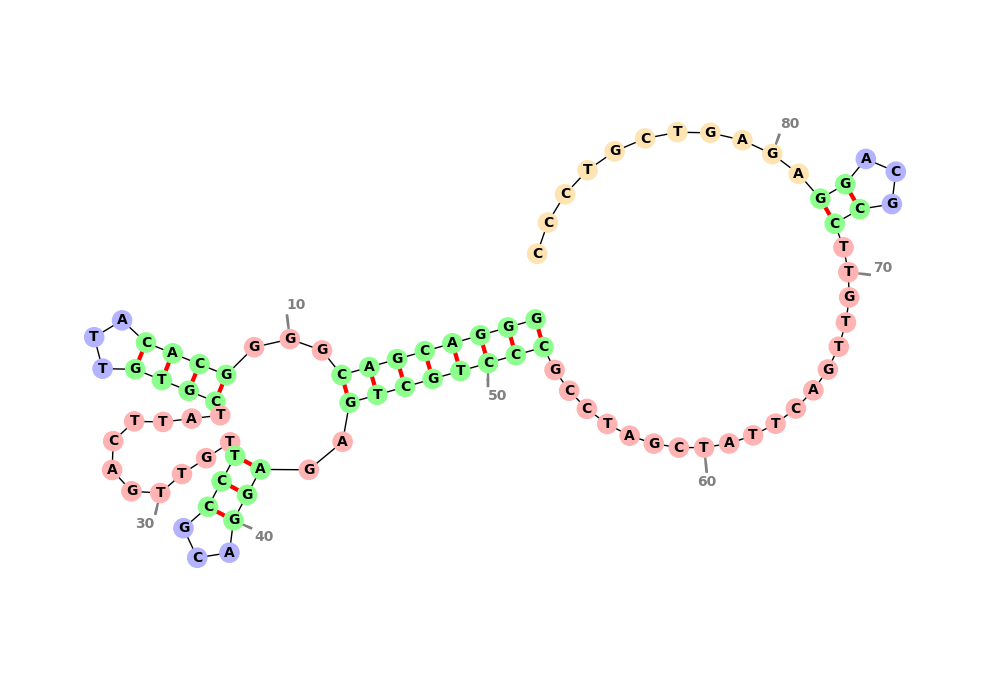

GMfold


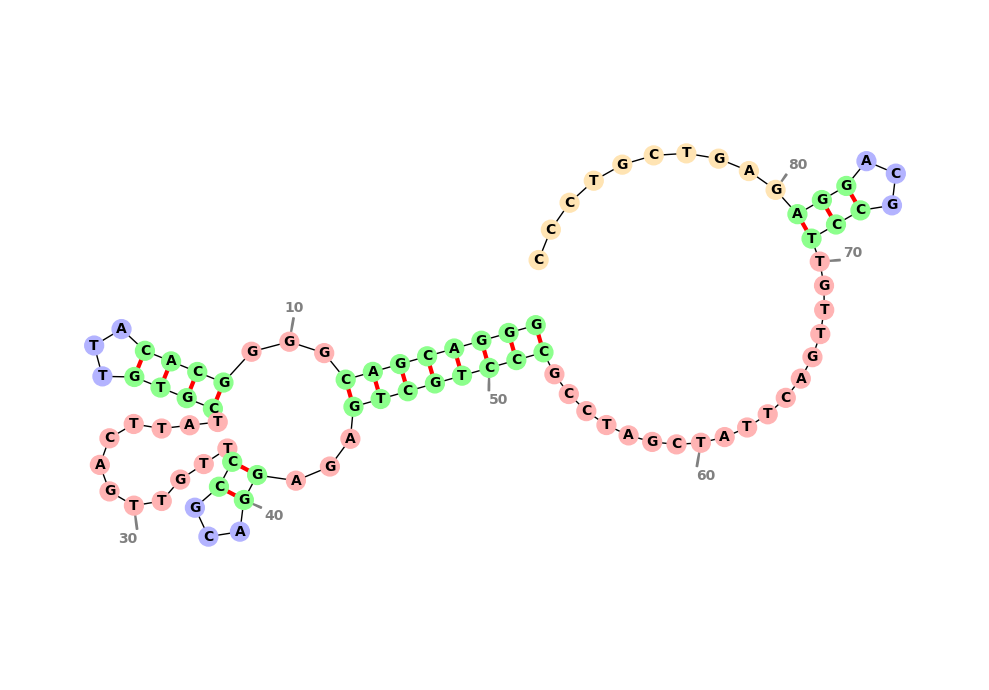

Seqfold2.0


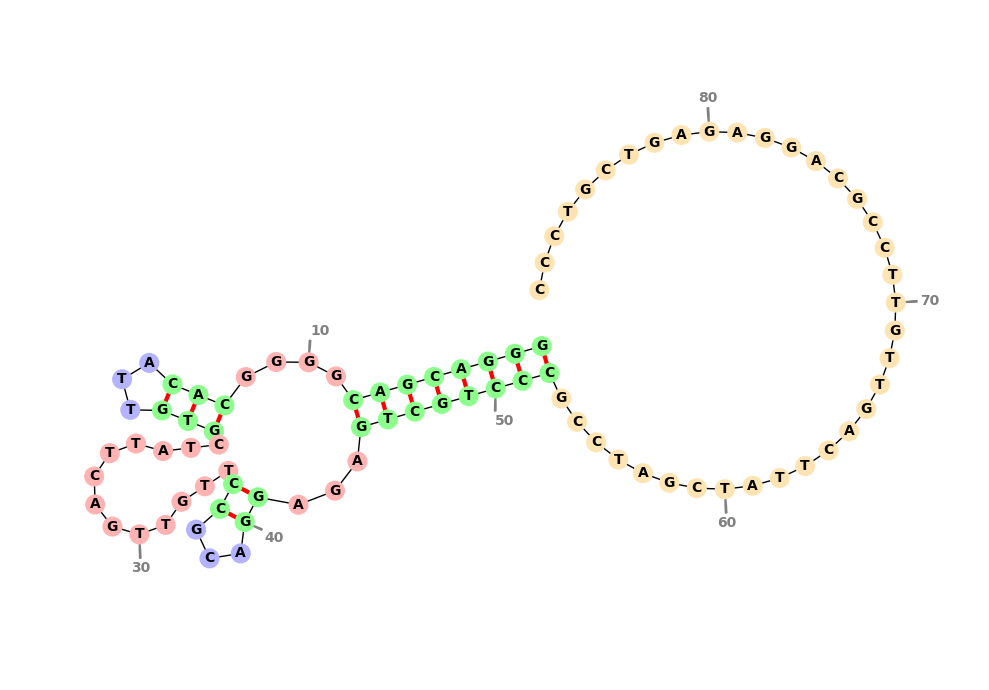

Seqfold


c:\Users\clima\anaconda3b\envs\aptamers_fold\Lib\site-packages\forgi\visual\mplotlib.py:118: RuntimeWarning: invalid value encountered in divide
  norm_vec/=ftuv.magnitude(norm_vec)


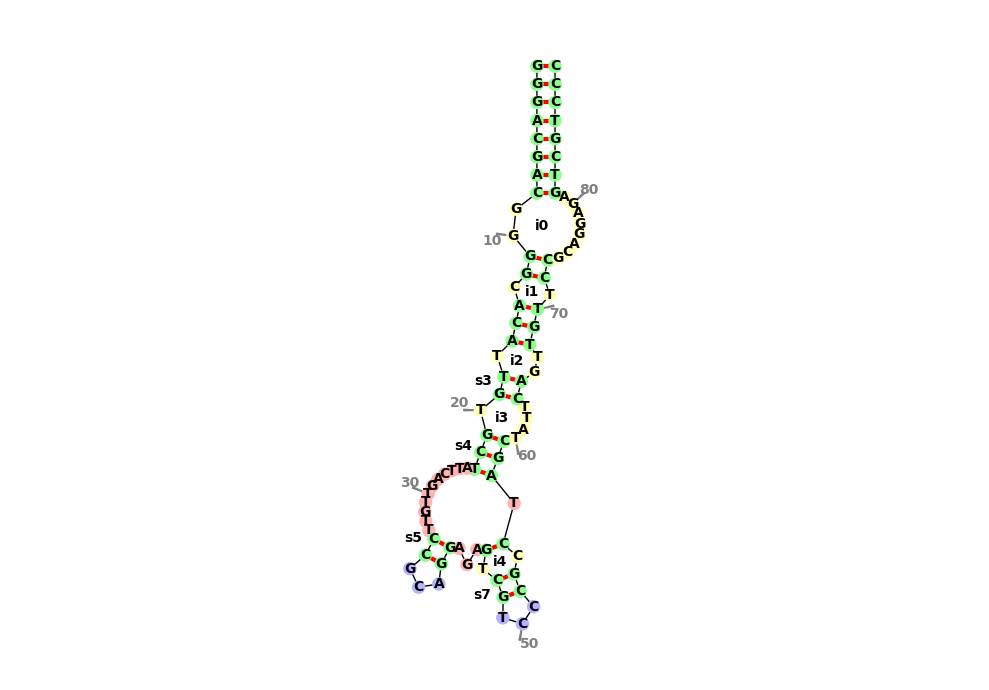

In [3]:
# Function to plot structures
def plot_structure(seq, struct= None, d_b = None):
    if struct != None:
        d_b = gm_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    fig, ax = plt.subplots(figsize=(10, 7))
    fvm.plot_rna(bg, ax = ax, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})
    plt.tight_layout()
    plt.show()
    return

structs = gmfold(seq) # Run gmfold
structs1 = fold_2(seq) # Run Seqfold2.0
structs2 = fold(seq) #Run Sefold

print('mfold/unafold')
plot_structure(seq,d_b =  db_mfold)
print('GMfold')
plot_structure(seq, structs)
print('Seqfold2.0')
plot_structure(seq, structs1)
print('Seqfold')
plot_structure(seq, structs2)





# Comparison on sequences provided in the Seqfold github repository


S1
GGGAGGTCGTTACATCTGGGTAACACCGGTACTGATCCGGTGACCTCCC
time gmfold 0.07593894004821777
time Seqfold 2.0 0.18945574760437012
time Seqfold 0.11993789672851562


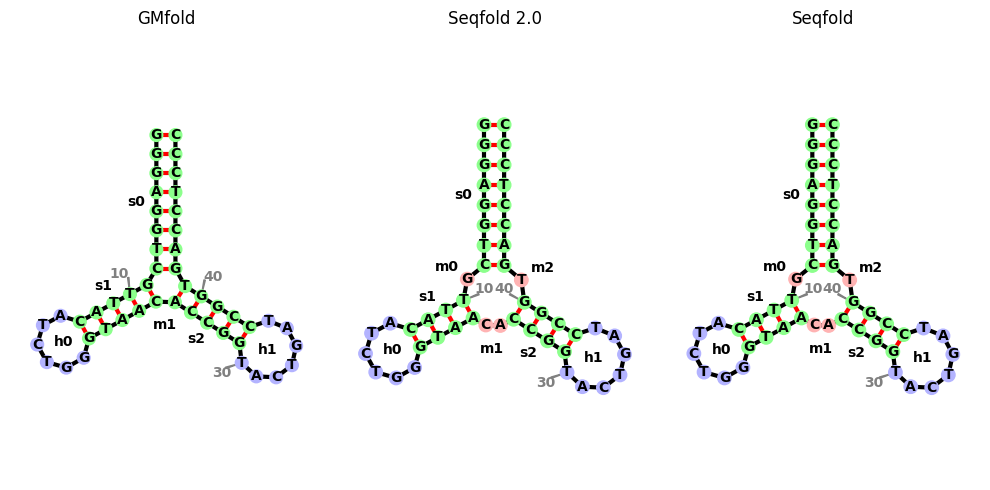

S2
GGGAGGTCGCTCCAGCTGGGAGGAGCGTTGGGGGTATATACCCCCAACACCGGTACTGATCCGGTGACCTCCC
time gmfold 1.8082480430603027
time Seqfold 2.0 0.37259793281555176
time Seqfold 0.5269861221313477


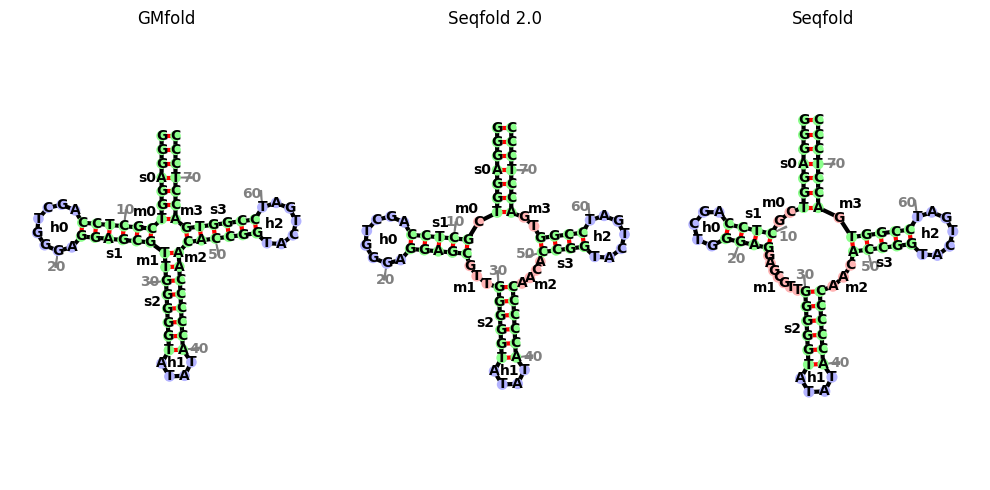

S3
TAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGT
time gmfold 0.01817917823791504
time Seqfold 2.0 0.035773277282714844
time Seqfold 0.035933494567871094


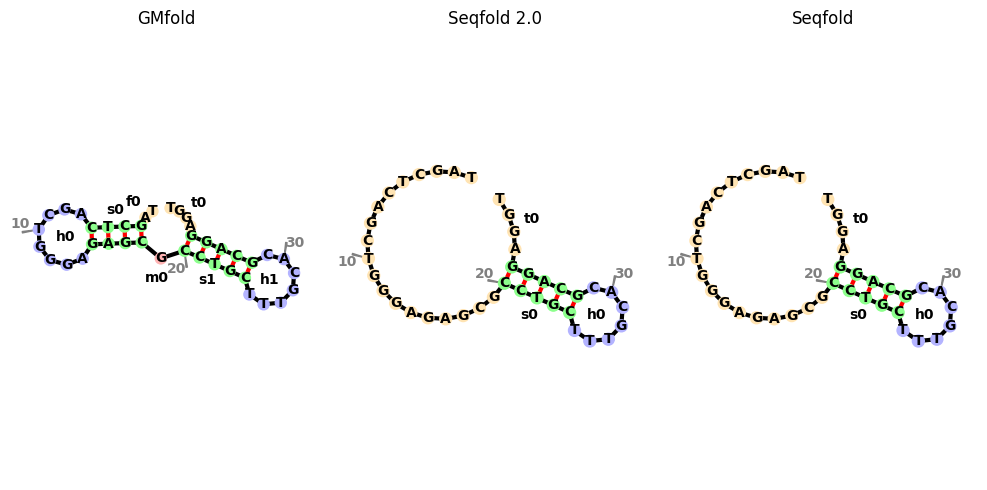

S4
GGGGGCATAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGTCTGCGGTTCGATCCCGCGCGCTCCCACCA
time gmfold 2.679989814758301
time Seqfold 2.0 0.3544189929962158
time Seqfold 0.5028588771820068


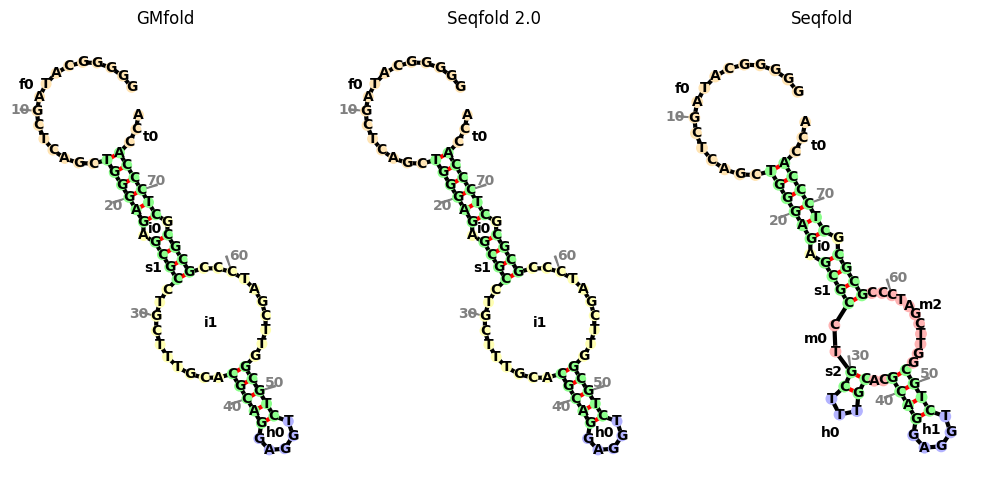

TGAGACGGAAGGGGATGATTGTCCCCTTCCGTCTCA
time gmfold 0.013424396514892578
time Seqfold 2.0 0.02273273468017578
time Seqfold 0.019521713256835938


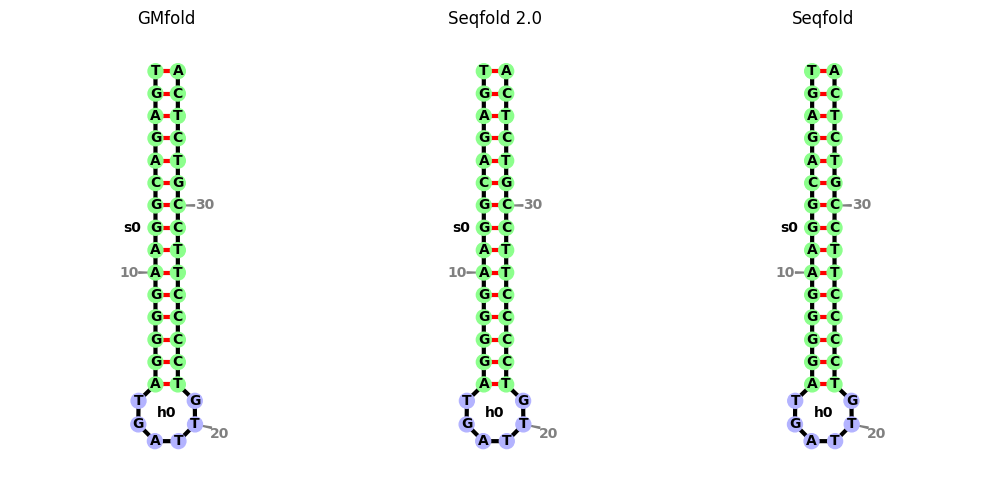

ACCCCCTCCTTCCTTGGATCAAGGGGCTCAA
time gmfold 0.007999897003173828
time Seqfold 2.0 0.015353918075561523
time Seqfold 0.01266622543334961


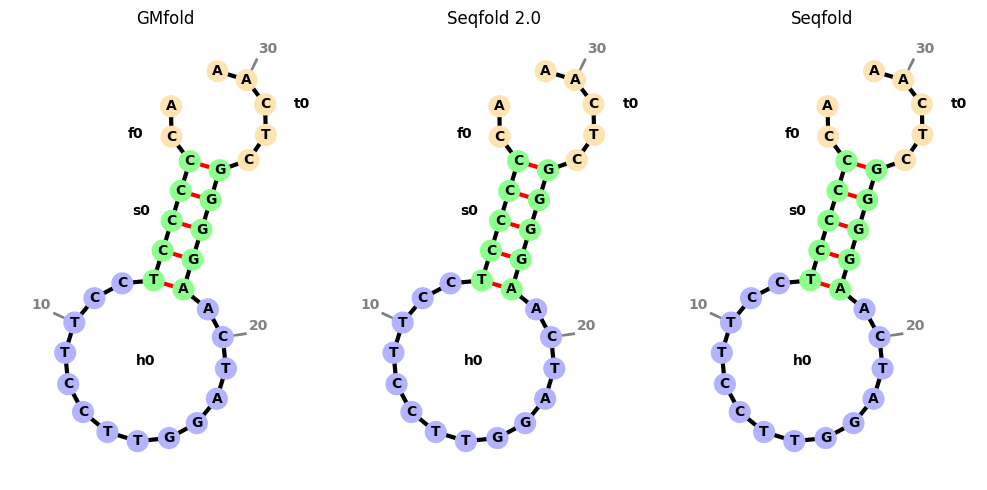

S5
TGTCAGAAGTTTCCAAATGGCCAGCAATCAACCCATTCCATTGGGGATACAATGGTACAGTTTCGCATATTGTCGGTGAAAATGGTTCCATTAAACTCC
time gmfold 0.7133479118347168
time Seqfold 2.0 0.9376010894775391
time Seqfold 1.388150691986084


c:\Users\clima\anaconda3b\envs\aptamers_fold\Lib\site-packages\forgi\visual\mplotlib.py:118: RuntimeWarning: invalid value encountered in divide
  norm_vec/=ftuv.magnitude(norm_vec)


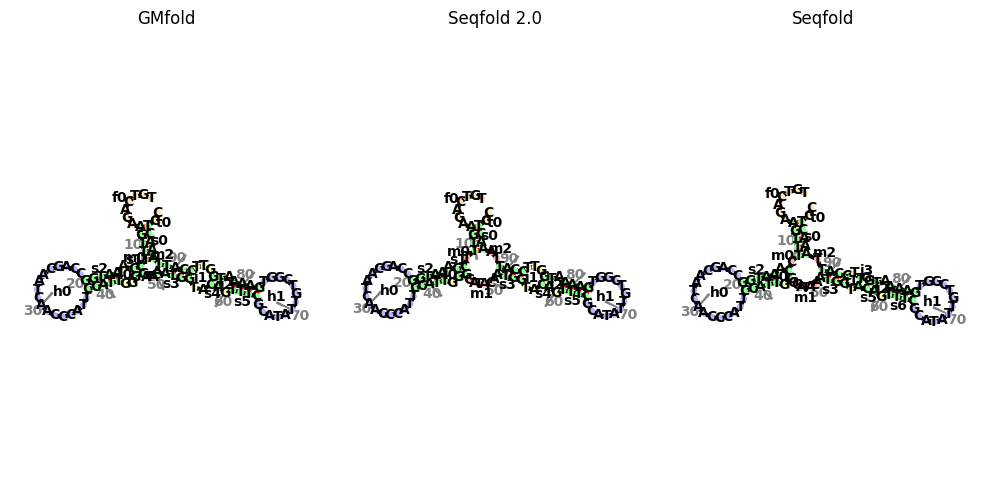

In [4]:
# Compare  gmfold, Seqfold 2.0 and Seqfold on sequences provided in Seqfold github reposoitory. 
df = pd.read_csv(r'..\data\dna.csv')


sequences_in_table = {0: 'S1', 1: 'S2', 3: 'S3', 4: 'S4', 7: 'S5'}

for count, seq in enumerate(df['seq']):
   
    if 'U' not in seq:
        if count in sequences_in_table:
            print(sequences_in_table[count])
        print(seq)
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
        start_time = time.time()
        structs = gmfold(seq, l_fix = 0, n_branches=4)
        print('time gmfold',time.time() - start_time  )
        d_b = gm_dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,ax = ax1, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax1.set_title('GMfold')
        
        
        start_time = time.time()
        structs = fold_2(seq)
        print('time Seqfold 2.0',time.time() - start_time  )
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,ax = ax2, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax2.set_title('Seqfold 2.0')
        
        start_time = time.time()
        structs = fold(seq)
        print('time Seqfold', time.time() - start_time  )
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,  ax= ax3, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax3.set_title('Seqfold')
        
        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()
    
